<a href="https://colab.research.google.com/github/Randasabag/Projet-5-ML/blob/main/Copie_de_P5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Partie 1 : Librairies et Données

In [1]:
import numpy
print(numpy.__version__)

import gensim
print(gensim.__version__)

1.26.4


/Users/randaalsabbagh/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


4.3.3


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from wordcloud import WordCloud 
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim import corpora
from gensim.models import LdaModel, Word2Vec
import gensim
from gensim import corpora
import pyLDAvis
import pyLDAvis.gensim
import pyLDAvis.gensim_models
from gensim.models.coherencemodel import CoherenceModel
import pyLDAvis.gensim as gensimvis
import gensim.downloader as api
import warnings
from collections import Counter
import joblib
from sklearn.metrics import coverage_error
from sklearn.metrics import label_ranking_average_precision_score
from sklearn.metrics import label_ranking_loss
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
import warnings
warnings.filterwarnings('ignore')
import os
import mlflow

In [3]:
df=pd.read_csv('/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/Requete principaleP5.csv', sep=',')
df.head()

Title  \
0  How do I delete a Git branch locally and remot...   
1  Find all files containing a specific text (str...   
2  How do I force "git pull" to overwrite local f...   
3  How do I check if a string contains a specific...   
4                    Renaming column names in Pandas   

                                                Body  \
0  <p>Failed Attempts to Delete a Remote Branch:<...   
1  <p>How do I find all files containing a specif...   
2  <p>How do I force an overwrite of local files ...   
3  <p>Consider:</p>\n\n<pre><code>$a = 'How are y...   
4  <p>I want to change the column labels of a Pan...   

                                                Tags        Id  Score  \
0  <git><version-control><git-branch><git-push><g...   2003505  20378   
1               <linux><text><grep><directory><find>  16956810   7501   
2  <git><version-control><overwrite><git-pull><gi...   1125968   9662   
3  <php><string><substring><contains><string-matc...   4366730   2655   
4       <python><pandas><replace><dataframe><rename>  11346283   2974   

   ViewCount  FavoriteCount  AnswerCount  
0   11525076            0.0           41  
1   11034477            0.0           56  
2    8559695            0.0           54  
3    6713692            0.0           36  
4    6485201            0.0           33

# Partie 2 : Exploratory Data Analysis

## Analyse univariée

In [4]:
print(df.shape)

(50000, 8)


In [5]:
df.isnull().sum()

Title               0
Body                0
Tags                0
Id                  0
Score               0
ViewCount           0
FavoriteCount    2105
AnswerCount         0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.dtypes

Title             object
Body              object
Tags              object
Id                 int64
Score              int64
ViewCount          int64
FavoriteCount    float64
AnswerCount        int64
dtype: object

In [8]:
df['Title'].nunique()

49998

In [9]:
df['Tags'].nunique()

48210

In [10]:
df['Score'].nunique()

1136

In [11]:
#Résumé stat
df.describe(include="all").round(2)

Title  \
count                                       50000   
unique                                      49998   
top     error LNK2019: unresolved external symbol   
freq                                            2   
mean                                          NaN   
std                                           NaN   
min                                           NaN   
25%                                           NaN   
50%                                           NaN   
75%                                           NaN   
max                                           NaN   

                                                     Body  \
count                                               50000   
unique                                              50000   
top     <p>Failed Attempts to Delete a Remote Branch:<...   
freq                                                    1   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                                     Tags           Id  \
count                                               50000     50000.00   
unique                                              48210          NaN   
top     <javascript><jquery><html><css><twitter-bootst...          NaN   
freq                                                   54          NaN   
mean                                                  NaN  23534146.62   
std                                                   NaN  18457762.39   
min                                                   NaN         4.00   
25%                                                   NaN   7627668.50   
50%                                                   NaN  19259575.00   
75%                                                   NaN  37005176.00   
max                                                   NaN  78163859.00   

           Score    ViewCount  FavoriteCount  AnswerCount  
count   50000.00     50000.00       47895.00     50000.00  
unique       NaN          NaN            NaN          NaN  
top          NaN          NaN            NaN          NaN  
freq         NaN          NaN            NaN          NaN  
mean       75.47    100323.50           0.00         6.06  
std       282.87    217034.14           0.15         5.80  
min         6.00     24698.00           0.00         1.00  
25%        15.00     33135.75           0.00         3.00  
50%        29.00     48757.50           0.00         4.00  
75%        61.00     90192.75           0.00         7.00  
max     27247.00  11525076.00          32.00       141.00

In [12]:
df.columns

Index(['Title', 'Body', 'Tags', 'Id', 'Score', 'ViewCount', 'FavoriteCount',
       'AnswerCount'],
      dtype='object')

### Visualisation

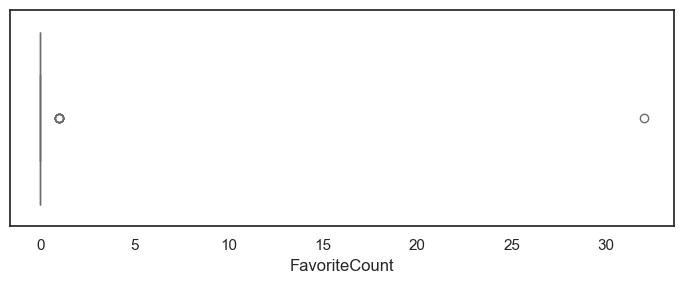

In [13]:
# Visualisation des outliers de FavoriteCount
plt.figure(figsize=(7, 3))
sns.set(style="white", palette="husl")
sns.boxplot(data=df, x='FavoriteCount')

# Espacement entre les graphiques
plt.tight_layout()

plt.savefig("boxplots_outliers.png")

In [14]:
# Je supprime la colonne FavoriteCount car elle a une médiane de 0 donc elle ne nous sera pas utile
df.drop('FavoriteCount', axis=1, inplace=True)

In [15]:
df.columns

Index(['Title', 'Body', 'Tags', 'Id', 'Score', 'ViewCount', 'AnswerCount'], dtype='object')

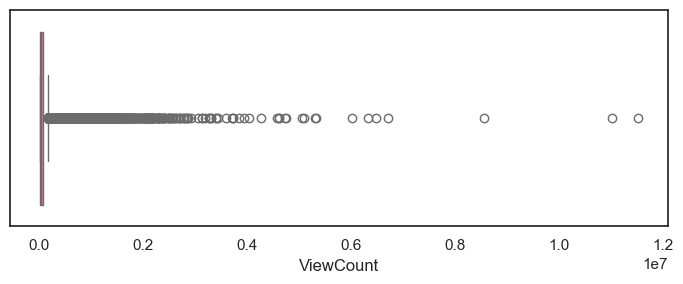

In [16]:
# Visualisation des outliers de ViewCount
plt.figure(figsize=(7, 3))
sns.set(style="white", palette="husl")
sns.boxplot(data=df, x='ViewCount')

# Espacement entre les graphiques
plt.tight_layout()
plt.savefig("boxplots_outliers_viewcount.png")

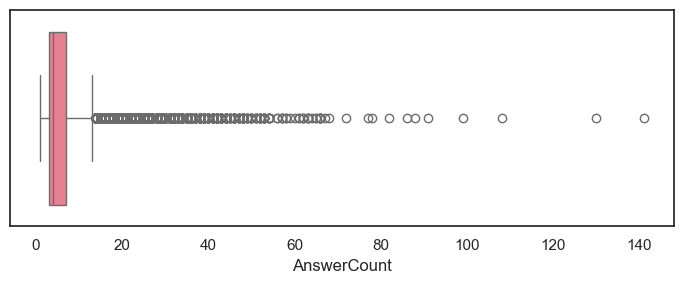

In [17]:
# Visualisation des outliers de AnswerCount
plt.figure(figsize=(7, 3))
sns.set(style="white", palette="husl")
sns.boxplot(data=df, x='AnswerCount')

# Espacement entre les graphiques
plt.tight_layout()
plt.savefig("boxplots_outliers_answercount.png")

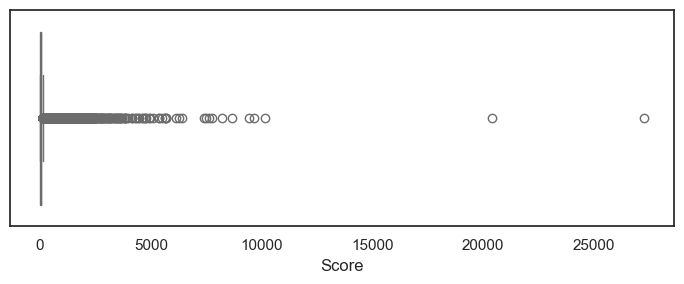

In [18]:
# Visualisation des outliers de la variable Score
plt.figure(figsize=(7, 3))
sns.set(style="white", palette="husl")
sns.boxplot(data=df, x='Score')

# Espacement entre les graphiques
plt.tight_layout()
plt.savefig("boxplots_outliers_score.png")

### Histogramme

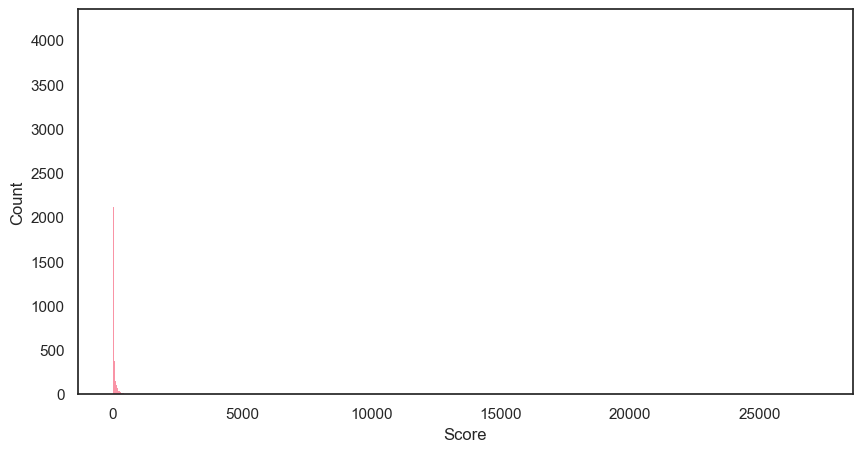

<Figure size 640x480 with 0 Axes>

In [19]:
# Visualisation de l'histogramme de la variable Score
plt.figure(figsize=(10, 5))
sns.set(style="white", palette="husl")
sns.histplot(data=df, x='Score')
plt.show()

# Espacement entre les graphiques
plt.tight_layout()
plt.savefig("hist_score.png")

### WordCloud

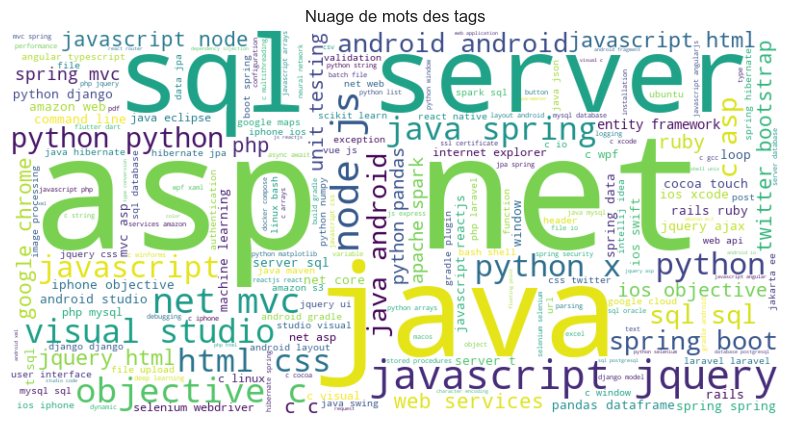

<Figure size 640x480 with 0 Axes>

In [20]:
# WordCloud de la variable Tags
# Convertir la liste en une chaîne de caractères
text = ' '.join(df['Tags'])

# Créer un objet WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots des tags')
plt.show()
plt.savefig("WordCloud_tags.png")

In [21]:
for index, vect in df.iterrows():
  print(vect['Tags'])

<git><version-control><git-branch><git-push><git-remote>
<linux><text><grep><directory><find>
<git><version-control><overwrite><git-pull><git-fetch>
<php><string><substring><contains><string-matching>
<python><pandas><replace><dataframe><rename>
<javascript><jquery><cors><postman><same-origin-policy>
<git><repository><git-branch><git-push><git-remote>
<sql><sql-server><t-sql><sql-update><dml>
<javascript><arrays><loops><foreach><iteration>
<mysql><database><import><command-line><dump>
<bash><shell><syntax><concatenation><string-concatenation>
<python><shell><terminal><subprocess><command>
<python><parsing><floating-point><type-conversion><integer>
<python><namespaces><program-entry-point><python-module><idioms>
<sql><sql-server><t-sql><if-statement><case>
<git><git-commit><git-clone><git-add><git-refspec>
<json><rest><spring-mvc><curl><http-headers>
<python><pandas><dataframe><select><indexing>
<python><pandas><dataframe><types><casting>
<javascript><jquery><checkbox><selected><checked

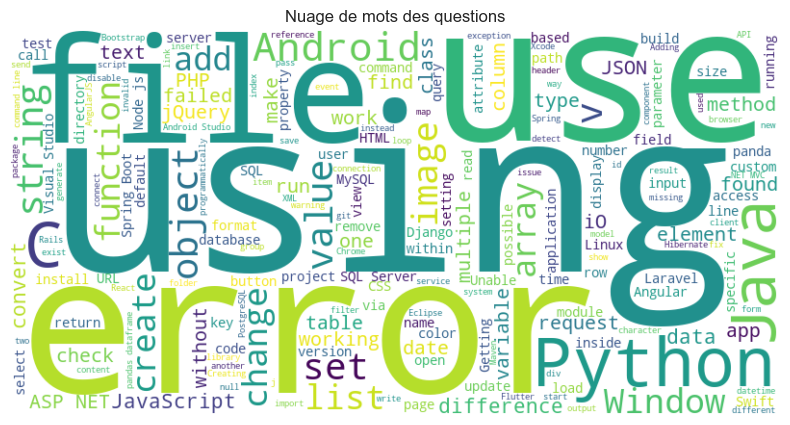

<Figure size 640x480 with 0 Axes>

In [22]:
# WordCloud de la variable Title
# Convertir la liste en une chaîne de caractères
text = ' '.join(df['Title'])

# Créer un objet WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots des questions')
plt.show()
plt.savefig("WordCloud_title.png")

In [23]:
for index, vect in df.head(5).iterrows():
  print(vect['Title'])

How do I delete a Git branch locally and remotely?
Find all files containing a specific text (string) on Linux?
How do I force "git pull" to overwrite local files?
How do I check if a string contains a specific word?
Renaming column names in Pandas


## Analyse multivariée

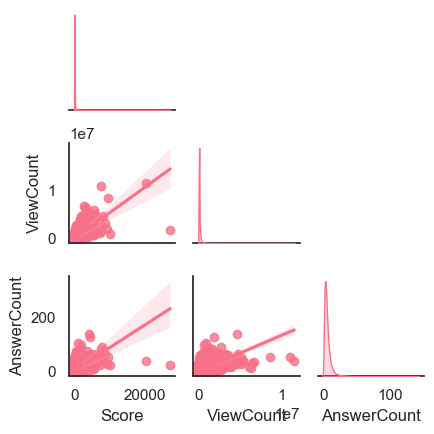

In [25]:
# Pairplot
var_num = ['Score', 'ViewCount', 'AnswerCount']
sns.pairplot(df[var_num].dropna(), diag_kind="kde", height=1.5, x_vars=var_num, y_vars=var_num, corner=True, kind='reg')
plt.tight_layout()
plt.savefig("pairplot.png")

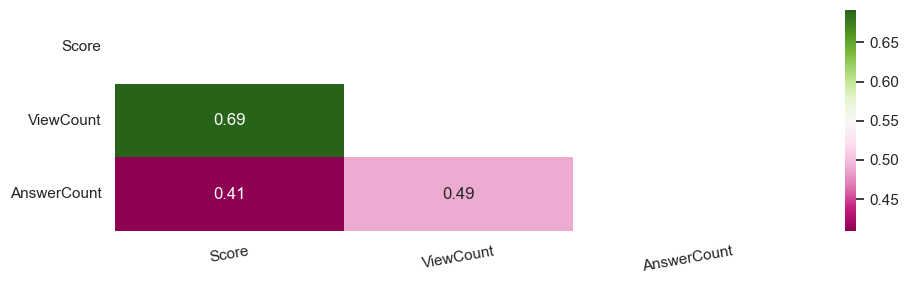

In [26]:
# Matrice de corrélation
plt.figure(figsize=(10, 3))
df_finum = df[var_num].dropna()
matrix = df_finum.corr()

# Masque la moitié inférieure de la matrice
mask = np.triu(np.ones_like(matrix, dtype=bool))

sns.heatmap(data=matrix, annot=True, cmap='PiYG', mask=mask)
plt.xticks(rotation=10)
plt.tight_layout()
plt.savefig("matrice_corr.png")
plt.show()

# Partie 3 : Analyse textuelle


In [27]:
doc = df.Title
doc.head()

0    How do I delete a Git branch locally and remot...
1    Find all files containing a specific text (str...
2    How do I force "git pull" to overwrite local f...
3    How do I check if a string contains a specific...
4                      Renaming column names in Pandas
Name: Title, dtype: object

In [28]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/randaalsabbagh/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [29]:
# Tokenizer
# Séparer par mot (tableaux de mots)
def tokenizer_fct(sentence) :
    sentence_clean = sentence.replace('-', ' ').replace('+', ' ').replace('/', ' ').replace('#', ' ').replace('_', ' ').replace("'", ' ')
    word_tokens = word_tokenize(sentence_clean)
    return word_tokens

# Stop words
stop_w = list(set(stopwords.words('english'))) + ['[', ']', ',', '.', ':', '?', '(', ')', '_', 'how', 'are', "can't", 'en', 'has', 'in', 'pas']

def stop_word_filter_fct(list_words) :
    filtered_w = [w for w in list_words if not w in stop_w]
    filtered_w2 = [w for w in filtered_w if len(w) > 2]
    return filtered_w2
 
# lower case et alpha
def lower_start_fct(list_words) :
    lw = [w.lower() for w in list_words if (not w.startswith("@")) 
                                       and (not w.startswith("http"))]
    return lw

# Lemmatizer (base d'un mot)
def lemma_fct(list_words) :
    lemmatizer = WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in list_words]
    return lem_w

# Fonction de préparation du texte pour le bag of words (Countvectorizer et Tf_idf, Word2Vec)
def transform_bow_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

# Fonction de préparation du texte pour le bag of words avec lemmatization
def transform_bow_lem_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lem_w)
    return transf_desc_text

# Fonction de préparation du texte pour le Deep learning (USE et BERT)
def transform_dl_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    lw = lower_start_fct(word_tokens)
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

df['sentence_bow'] = df['Title'].apply(lambda x : transform_bow_fct(x))
df['sentence_bow_lem'] = df['Title'].apply(lambda x : transform_bow_lem_fct(x))
df['sentence_dl'] = df['Title'].apply(lambda x : transform_dl_fct(x))
df.shape
df.head()

Title  \
0  How do I delete a Git branch locally and remot...   
1  Find all files containing a specific text (str...   
2  How do I force "git pull" to overwrite local f...   
3  How do I check if a string contains a specific...   
4                    Renaming column names in Pandas   

                                                Body  \
0  <p>Failed Attempts to Delete a Remote Branch:<...   
1  <p>How do I find all files containing a specif...   
2  <p>How do I force an overwrite of local files ...   
3  <p>Consider:</p>\n\n<pre><code>$a = 'How are y...   
4  <p>I want to change the column labels of a Pan...   

                                                Tags        Id  Score  \
0  <git><version-control><git-branch><git-push><g...   2003505  20378   
1               <linux><text><grep><directory><find>  16956810   7501   
2  <git><version-control><overwrite><git-pull><gi...   1125968   9662   
3  <php><string><substring><contains><string-matc...   4366730   2655   
4       <python><pandas><replace><dataframe><rename>  11346283   2974   

   ViewCount  AnswerCount                                      sentence_bow  \
0   11525076           41            how delete git branch locally remotely   
1   11034477           56  find files containing specific text string linux   
2    8559695           54          how force git pull overwrite local files   
3    6713692           36           how check string contains specific word   
4    6485201           33                      renaming column names pandas   

                                  sentence_bow_lem  \
0           how delete git branch locally remotely   
1  find file containing specific text string linux   
2          how force git pull overwrite local file   
3          how check string contains specific word   
4                       renaming column name panda   

                                         sentence_dl  
0  how do i delete a git branch locally and remot...  
1  find all files containing a specific text ( st...  
2  how do i force `` git pull '' to overwrite loc...  
3  how do i check if a string contains a specific...  
4                    renaming column names in pandas

In [30]:
# Enregistrer le DataFrame en CSV
df.to_csv('/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/df_tok.csv', index=False)

In [31]:
df['sentence_bow'].head()

0              how delete git branch locally remotely
1    find files containing specific text string linux
2            how force git pull overwrite local files
3             how check string contains specific word
4                        renaming column names pandas
Name: sentence_bow, dtype: object

In [32]:
transform_bow_fct(text) 

'how delete git branch locally remotely find files containing specific text string linux how force git pull overwrite local files how check string contains specific word renaming column names pandas why javascript code receive access control allow origin header present requested resource error postman how push new local branch remote git repository track how update select sql server loop array javascript how import sql file using command line mysql how concatenate string variables bash how execute program call system command how parse string float int what name main how perform ... then sql select message src refspec master match pushing commits git how post json data curl selecting multiple columns pandas dataframe change column type pandas setting checked checkbox jquery how create directory missing parent directories how copy files how return date sql server datetime datatype how check array includes value javascript how determine variable undefined null insert ... values select ...

In [33]:
tokenizer_fct('What does if __name__ == "__main__": do?')

['What', 'does', 'if', 'name', '==', '``', 'main', '``', ':', 'do', '?']

In [34]:
df.to_csv("data_titres.csv")

In [35]:
df =  pd.read_csv("data_titres.csv")
print(df.shape)

(50000, 11)


In [36]:
df['length_bow'] = df['sentence_bow'].apply(lambda x : len(word_tokenize(x)))
print("max length bow : ", df['length_bow'].max())
df['length_bow_lem'] = df['sentence_bow_lem'].apply(lambda x : len(word_tokenize(x)))
print("max length bow lem : ", df['length_bow_lem'].max())
df['length_dl'] = df['sentence_dl'].apply(lambda x : len(word_tokenize(x)))
print("max length dl : ", df['length_dl'].max())

max length bow :  19
max length bow lem :  19
max length dl :  47


# Partie 4 : Extraction de caractéristiques

## Bag-of-words (bow)

On va transformer le vecteur corpus qui contient des chaînes de caractères en une matrice d’entiers.

La matrice contient autant de colonnes que de mots possibles dans le corpus.

On compte le nombre d’occurrences du mot dans chaque question.

In [37]:
df = df.sample(5000)

In [38]:
# création du bag of words (CountVectorizer et Tf-idf)
def color(val):
    color = 'blue' if val > 0 else ''
    return 'background-color: %s' % color

cv = CountVectorizer()
feat = 'sentence_bow_lem'
cv_transform = cv.fit_transform(df[feat])
cv_feature_names = cv.get_feature_names_out()
print('Term Frequency of Document')
dfcv = pd.DataFrame(cv_transform.toarray(), columns = cv_feature_names) / len(cv_feature_names)
dfcv.style.set_caption("Term Frequency of Document")
dfcv.style.applymap(color)
dfcv.head()

Term Frequency of Document


00  000  00201  00932  00942  01002  01008  01031  01086   04  ...  \
0  0.0  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.0  ...   
1  0.0  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.0  ...   
2  0.0  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.0  ...   
3  0.0  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.0  ...   
4  0.0  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.0  ...   

   zookeeper  zoom  zoomable  zooming  zsh  zshrc  zst  zulu  zuul  zxing  
0        0.0   0.0       0.0      0.0  0.0    0.0  0.0   0.0   0.0    0.0  
1        0.0   0.0       0.0      0.0  0.0    0.0  0.0   0.0   0.0    0.0  
2        0.0   0.0       0.0      0.0  0.0    0.0  0.0   0.0   0.0    0.0  
3        0.0   0.0       0.0      0.0  0.0    0.0  0.0   0.0   0.0    0.0  
4        0.0   0.0       0.0      0.0  0.0    0.0  0.0   0.0   0.0    0.0  

[5 rows x 5453 columns]

In [39]:
dfcv.columns

Index(['00', '000', '00201', '00932', '00942', '01002', '01008', '01031',
       '01086', '04',
       ...
       'zookeeper', 'zoom', 'zoomable', 'zooming', 'zsh', 'zshrc', 'zst',
       'zulu', 'zuul', 'zxing'],
      dtype='object', length=5453)

In [40]:
# pourcentage de valeurs # 0
full_dense = cv_transform.todense()
print("Full_doc sparsicity: {:.3f} %"\
      .format(((full_dense > 0).sum()/full_dense.size)*100))

Full_doc sparsicity: 0.114 %


## TF-IDF

In [41]:
tf = TfidfVectorizer()
feat = 'sentence_bow_lem'
tf_transform = tf.fit_transform(df[feat])
tf_feature_names = tf.get_feature_names_out()
print('Term Frequency - Inverse Document Frequency of Document')
dftf = pd.DataFrame(tf_transform.toarray(), columns = tf_feature_names) / len(tf_feature_names)
dftf.style.set_caption("Term Frequency of Document")
dftf.style.applymap(color)
dftf.head()

Term Frequency - Inverse Document Frequency of Document


00  000  00201  00932  00942  01002  01008  01031  01086   04  ...  \
0  0.0  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.0  ...   
1  0.0  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.0  ...   
2  0.0  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.0  ...   
3  0.0  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.0  ...   
4  0.0  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.0  ...   

   zookeeper  zoom  zoomable  zooming  zsh  zshrc  zst  zulu  zuul  zxing  
0        0.0   0.0       0.0      0.0  0.0    0.0  0.0   0.0   0.0    0.0  
1        0.0   0.0       0.0      0.0  0.0    0.0  0.0   0.0   0.0    0.0  
2        0.0   0.0       0.0      0.0  0.0    0.0  0.0   0.0   0.0    0.0  
3        0.0   0.0       0.0      0.0  0.0    0.0  0.0   0.0   0.0    0.0  
4        0.0   0.0       0.0      0.0  0.0    0.0  0.0   0.0   0.0    0.0  

[5 rows x 5453 columns]

In [42]:
dftf.to_csv("df_tfidf_p5.csv")

In [43]:
tf_feature_names

array(['00', '000', '00201', ..., 'zulu', 'zuul', 'zxing'], dtype=object)

In [44]:
dftf.columns

Index(['00', '000', '00201', '00932', '00942', '01002', '01008', '01031',
       '01086', '04',
       ...
       'zookeeper', 'zoom', 'zoomable', 'zooming', 'zsh', 'zshrc', 'zst',
       'zulu', 'zuul', 'zxing'],
      dtype='object', length=5453)

In [45]:
full_dense = tf_transform.todense()
print("Full_doc sparsicity: {:.3f} %"\
      .format(((full_dense > 0).sum()/full_dense.size)*100))

Full_doc sparsicity: 0.114 %
